<a href="https://colab.research.google.com/github/nmshafie1993/detect_yoga_pose/blob/master/Yoga_pose_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the Libraries
import math, re, os
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
import shutil

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0


In [2]:
shutil.rmtree('/content/detect_yoga_pose')

FileNotFoundError: ignored

In [3]:
#cloning the data from github
!git clone "https://github.com/nmshafie1993/detect_yoga_pose.git"

Cloning into 'detect_yoga_pose'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 1262 (delta 20), reused 44 (delta 15), pack-reused 1204
Receiving objects: 100% (1262/1262), 136.70 MiB | 45.77 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [4]:
ds_train_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Train_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Valid_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 838 files belonging to 4 classes.
Found 40 files belonging to 4 classes.


In [5]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [6]:
from keras.models import Sequential
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dense(units =128, activation = 'relu'),
        Dense(units =4, activation = 'softmax'),
        
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               25690240  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam (learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(x = ds_train, 
          validation_data = ds_valid, epochs = 30, 
          verbose = 2)


Epoch 1/30
14/14 - 14s - loss: 2.0030 - accuracy: 0.2709 - val_loss: 1.6187 - val_accuracy: 0.2500
Epoch 2/30
14/14 - 1s - loss: 1.5136 - accuracy: 0.2792 - val_loss: 1.3772 - val_accuracy: 0.3000
Epoch 3/30
14/14 - 1s - loss: 1.2818 - accuracy: 0.3986 - val_loss: 1.3596 - val_accuracy: 0.3000
Epoch 4/30
14/14 - 1s - loss: 1.1465 - accuracy: 0.5895 - val_loss: 1.3594 - val_accuracy: 0.3250
Epoch 5/30
14/14 - 1s - loss: 1.0391 - accuracy: 0.6516 - val_loss: 1.3430 - val_accuracy: 0.3750
Epoch 6/30
14/14 - 1s - loss: 0.9394 - accuracy: 0.6850 - val_loss: 1.3170 - val_accuracy: 0.4000
Epoch 7/30
14/14 - 1s - loss: 0.8369 - accuracy: 0.7327 - val_loss: 1.3190 - val_accuracy: 0.4500
Epoch 8/30
14/14 - 1s - loss: 0.7441 - accuracy: 0.7709 - val_loss: 1.2944 - val_accuracy: 0.5250
Epoch 9/30
14/14 - 1s - loss: 0.6684 - accuracy: 0.8055 - val_loss: 1.3687 - val_accuracy: 0.4000
Epoch 10/30
14/14 - 1s - loss: 0.6041 - accuracy: 0.8067 - val_loss: 1.3784 - val_accuracy: 0.4500
Epoch 11/30
14/14 

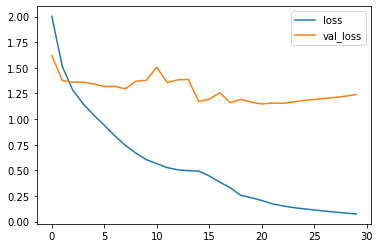

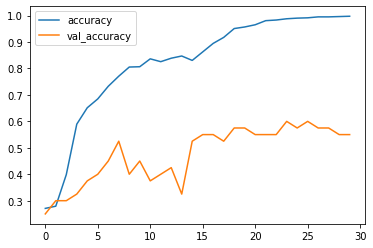

In [10]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();